##### Importing necassary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

#### Reading our Dataset

In [2]:
x = input("Enter the stock Ticker: ")

In [3]:
df = pd.read_csv("C:/Users/mohammad/OneDrive/Desktop/CI & AT/NIFTY50/output_" + x + ".csv")
df.head()

,Timestamp,Open,High,Low,Close,Volume,Timestamp2
0,946857600,39.74,41.63,39.74,41.54,676126,2000-01-03 05:30:00+05:30
1,946944000,41.58,41.97,39.48,39.90,679215,2000-01-04 05:30:00+05:30
2,947030400,37.18,41.74,37.18,40.87,1120951,2000-01-05 05:30:00+05:30
3,947116800,41.20,44.06,41.20,42.56,1968998,2000-01-06 05:30:00+05:30
4,947203200,42.93,45.97,42.75,45.97,2199431,2000-01-07 05:30:00+05:30


In [4]:
a = df["Timestamp2"]
j_values = []
for i in a:
    j_values.append(i.replace(" 05:30:00+05:30", ""))

df["Date"] = j_values

In [5]:
df.drop(columns=['Timestamp'], inplace=True)
df.drop(columns=['Timestamp2'], inplace=True)

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2024-04-05,1011.60,1012.5,1004.4,1007.1,4519120
2024-04-08,1010.05,1016.4,1004.0,1013.2,5188052
2024-04-09,1021.00,1029.5,1005.0,1008.5,8539041
2024-04-10,1012.25,1021.0,1010.0,1013.5,4554077
2024-04-12,1014.00,1029.0,1013.5,1018.5,11575194


Text(0.5, 1.0, 'NSE:TATAMOTORS')

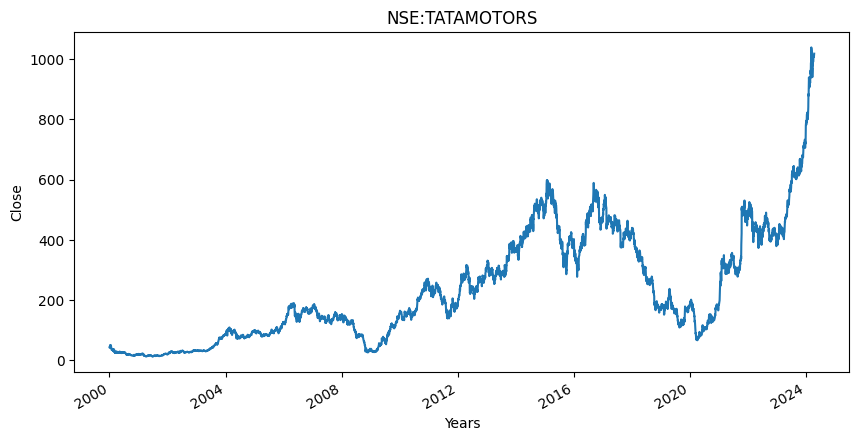

In [6]:
plt.figure(figsize = (10,5))
df["Close"].plot()
plt.ylabel("Close")
plt.xlabel("Years")
plt.title("NSE:" + x)

In [7]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.ylabel(column_name)
    plt.xlabel("Years")
    plt.title("NSE:" + x)

In [8]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

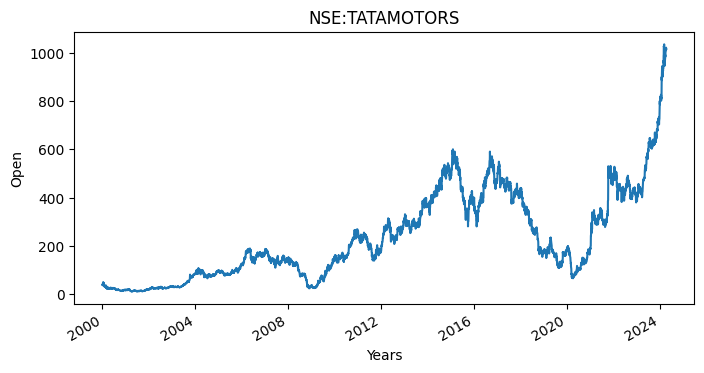

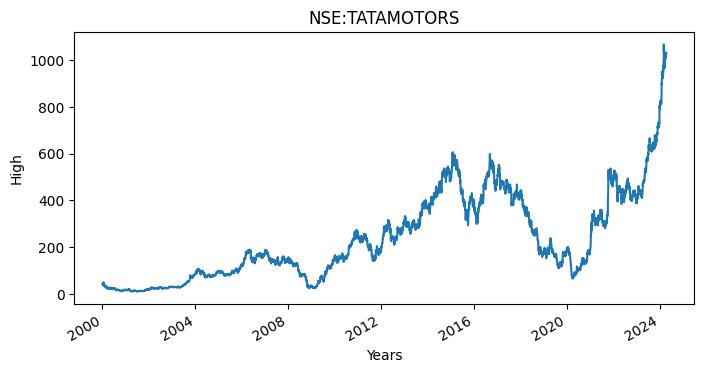

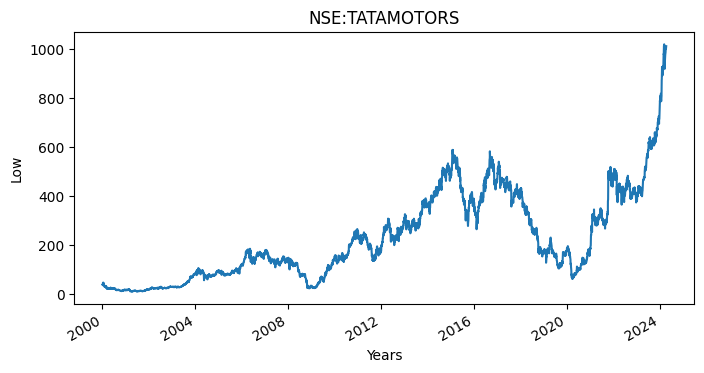

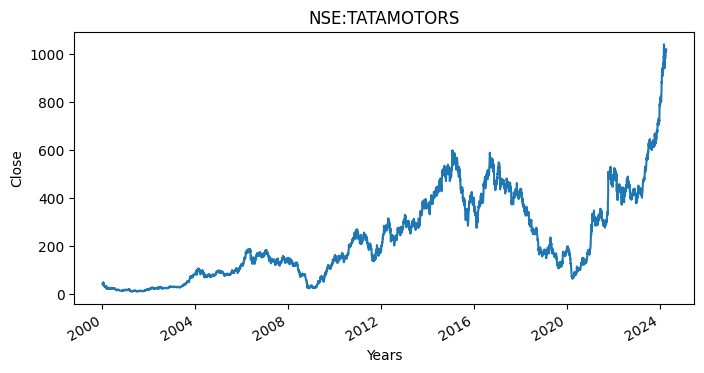

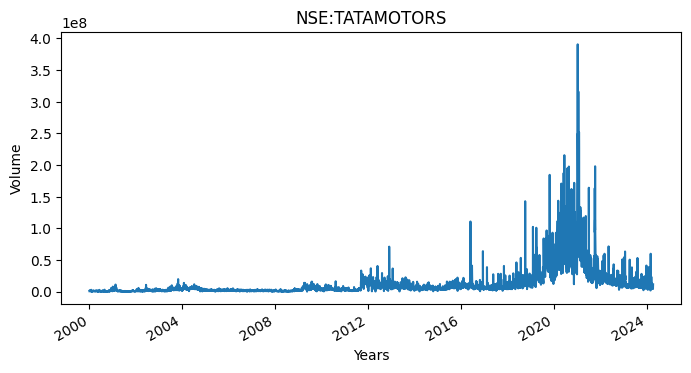

In [9]:
for column in df.columns:
    plot_graph((8,4), df[column], column )

In [10]:
df["MA_250"] = df['Close'].rolling(250).mean()
df["MA_100"] = df['Close'].rolling(100).mean()


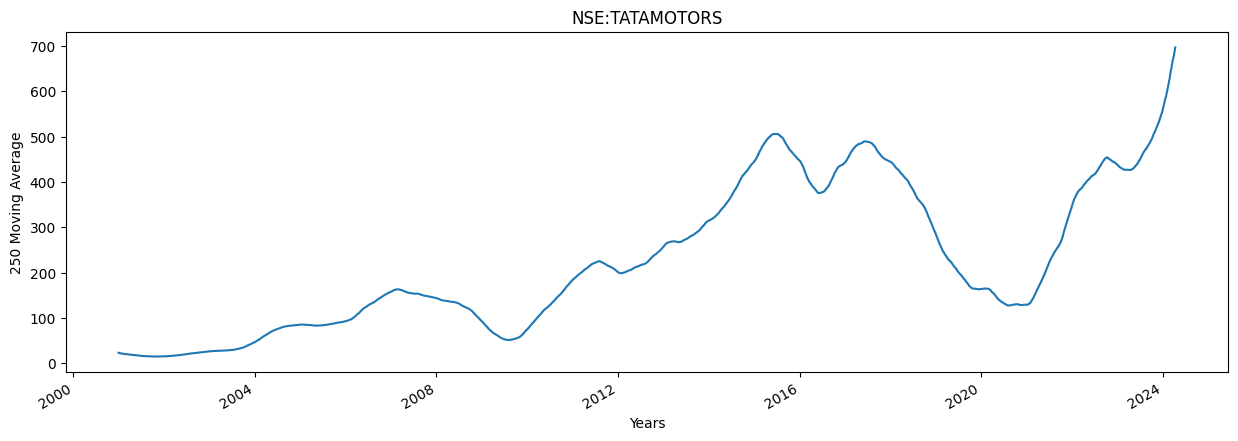

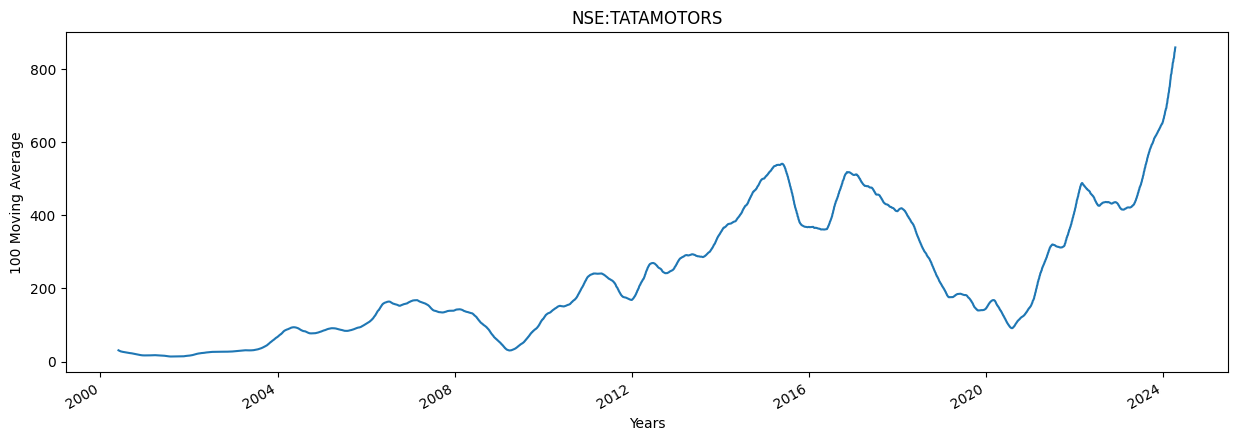

In [11]:
plot_graph((15,5), df['MA_250'], "250 Moving Average")
plot_graph((15,5), df['MA_100'], "100 Moving Average")

<Figure size 640x480 with 0 Axes>

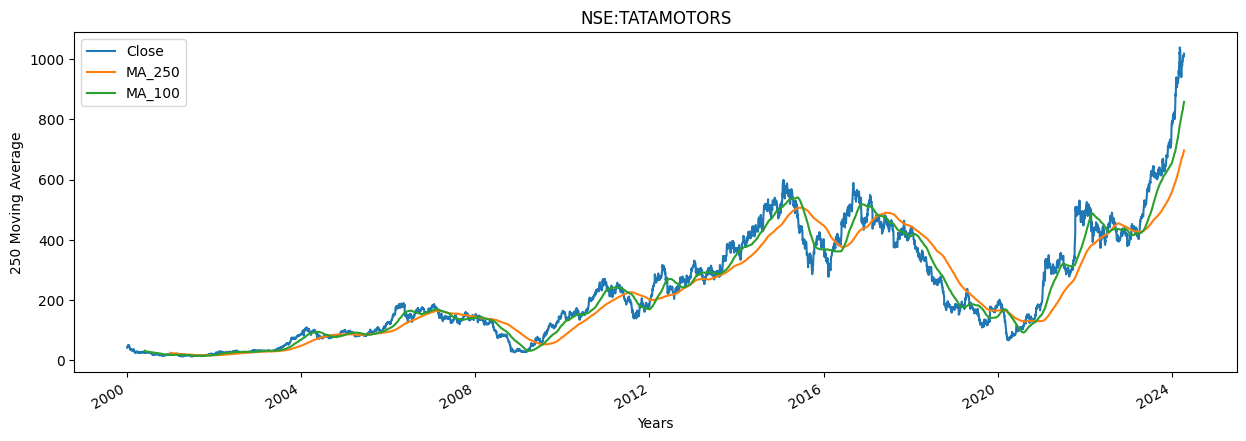

In [12]:
plot_graph((15,5), df[['Close','MA_250', 'MA_100']], "250 Moving Average")

In [13]:
df["Percentage_Change"] = df['Close'].pct_change()
df[["Close", "Percentage_Change"]].head(10)

,Close,Percentage_Change
Date,,
2000-01-03,41.54,NaN
2000-01-04,39.90,-0.039480
2000-01-05,40.87,0.024311
2000-01-06,42.56,0.041351
2000-01-07,45.97,0.080122
2000-01-10,49.60,0.078965
2000-01-11,45.64,-0.079839
2000-01-12,46.04,0.008764
2000-01-13,45.12,-0.019983


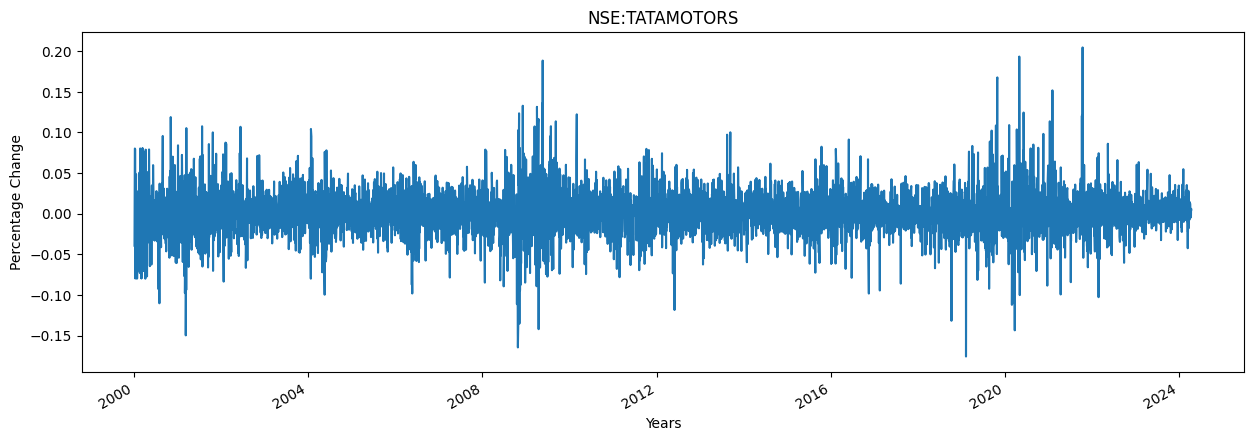

In [14]:
plot_graph((15,5), df['Percentage_Change'], "Percentage Change")

In [15]:
Close_price = df[["Close"]]

In [16]:
max(Close_price.values), min(Close_price.values)

(array([1039.3]), array([11.27]))

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Close_price)

scaled_data

array([[0.02944467],
       [0.02784938],
       [0.02879293],
       ...,
       [0.97003978],
       [0.97490346],
       [0.97976713]])

In [18]:
len(scaled_data)

6038

In [19]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)

In [20]:
splitting_length = int(len(x_data)*0.7)
x_train = x_data[:splitting_length]
y_train = y_data[:splitting_length]

x_test = x_data[splitting_length:]
y_test = y_data[splitting_length:]

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4156, 100, 1)
(4156, 1)
(1782, 100, 1)
(1782, 1)


In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [23]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Python 3.11\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
4156/4156 ━━━━━━━━━━━━━━━━━━━━ 120s 28ms/step - loss: 5.3376e-04
Epoch 2/2
4156/4156 ━━━━━━━━━━━━━━━━━━━━ 165s 40ms/step - loss: 1.2251e-04


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [27]:
predictions = model.predict(x_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step


In [28]:
predictions

array([[0.5117389 ],
       [0.50355095],
       [0.49388117],
       ...,
       [0.9477778 ],
       [0.9434265 ],
       [0.94867855]], dtype=float32)

In [29]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[537.35297],
       [528.9355 ],
       [518.9947 ],
       ...,
       [985.614  ],
       [981.14075],
       [986.54004]], dtype=float32)

In [30]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 531.5 ],
       [ 522.6 ],
       [ 525.85],
       ...,
       [1008.5 ],
       [1013.5 ],
       [1018.5 ]])

In [31]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [32]:
rmse

10.286676631685275

In [33]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = df.index[splitting_length+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2017-02-02,531.50,537.352966
2017-02-03,522.60,528.935486
2017-02-06,525.85,518.994690
2017-02-07,506.80,521.928406
2017-02-08,513.05,504.715179


<Figure size 640x480 with 0 Axes>

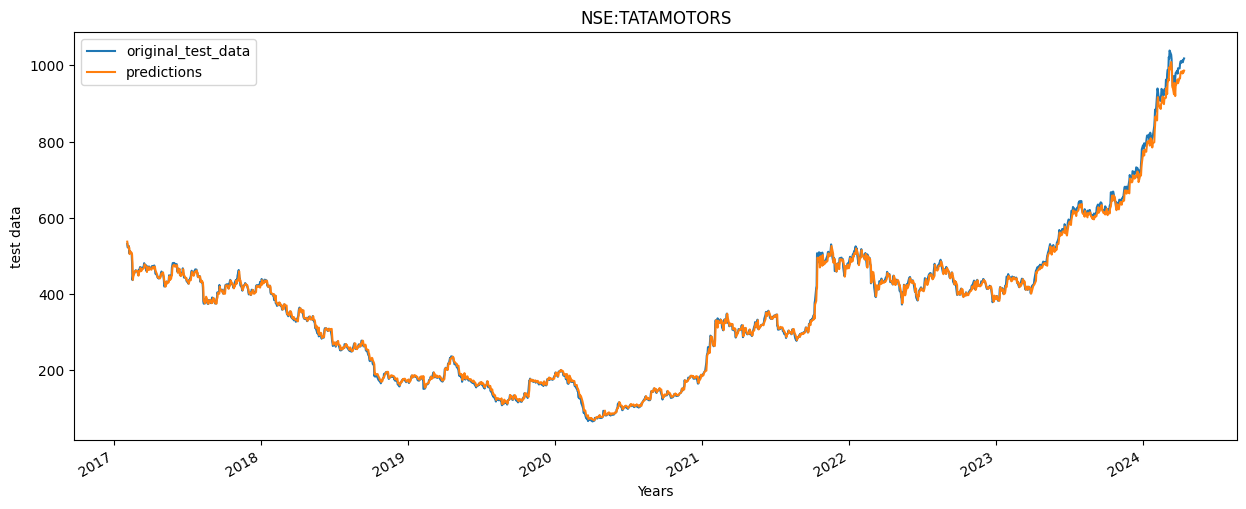

In [34]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

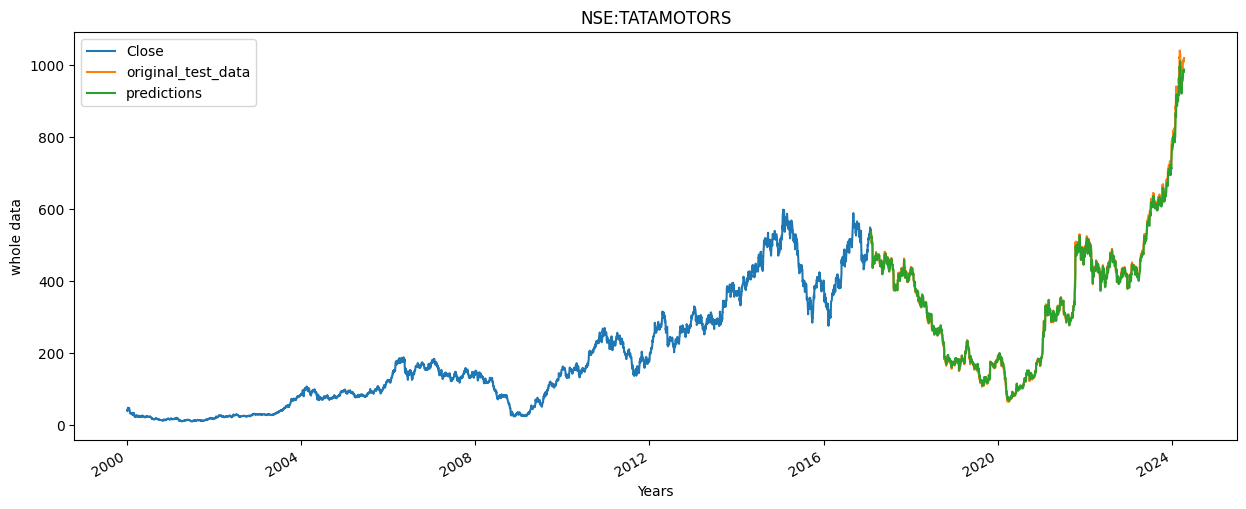

In [35]:
plot_graph((15,6), pd.concat([Close_price[:splitting_length+100],ploting_data], axis=0), 'whole data')

In [36]:
# model.save("Latest_stock_price_model_" + x + ".keras")